# TUTORIAL: TensorBoard integration in notebooks

The purpose of this tutorial is to show how it is possible to use TensorBoard with `AI Notebooks`.

**USE CASE: Image Classification with Fashion MNIST dataset**

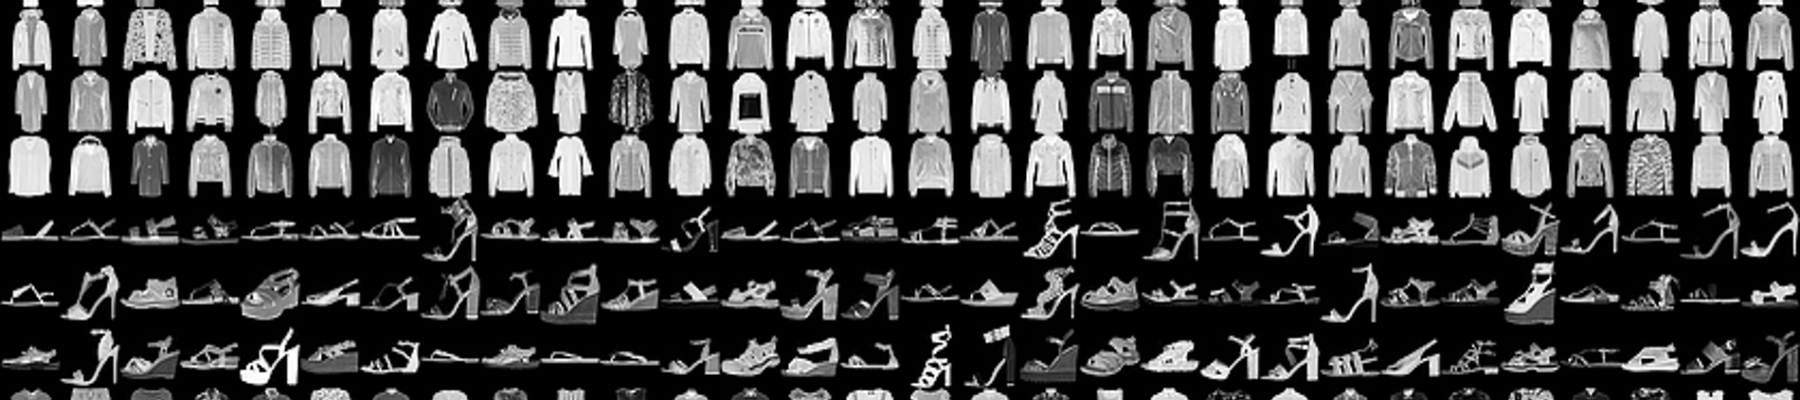

## Introduction

**What is TensorBoard?**

"*TensorBoard is TensorFlow's visualization toolkit, enabling you to track metrics like loss and accuracy, visualize the model graph, view histograms of weights, biases, or other tensors as they change over time, and much more. It is an open source tool that is part of the TensorFlow ecosystem.*" 

In this tutorial, you will be able to run TensorBoard in the same notebook as your experience.

But if you want to have a TensorBoard "**up and running**" 24/7 it is possible to do it differently by running:
- 1 notebook with just tensorboard
- 1 other with its training

You can then keep your TensorBoard active (with a notebook using a single CPU for example) and never stop it.

## Requirements

To use TensorBoard on `AI Notebooks` create a new notebook and you will be able to train your model on your dataset.

Thanks to this visualization toolkit, you will display your metrics as you train your model.

## Code

The different steps are as follow:

* Install depencies as necessary
* Download and prepare your dataset
* Display the first 25 images
* Define your model
* Launch your training
* Access to TensorBoard
* Overview of dynamic display with TensorBoard

### Install depencies as necessary

In [ ]:
# install dependencies
!pip install matplotlib pandas

In [2]:
# import dependencies
import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
import datetime

### Download and prepare your dataset

In [3]:
# load your dataset and split it (here the Fashion MNIST dataset)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# scale images to the [0, 1] range
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

# images must have shape (28,28,1)
X_train = X_train.reshape(-1 ,28 ,28 ,1)
X_test = X_test.reshape(-1 ,28 ,28 ,1)

# display test and train data size
print("X_train shape: ", X_train.shape) # number of train images, size
print("X_test shape: ", X_test.shape)   # number of test images, size
print("y_train shape: ", y_train.shape) # number of train labels (= number of train images)
print("y_test shape: ", y_test.shape)   # number of test labels (= number of test images)

X_train shape:  (60000, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)
y_train shape:  (60000,)
y_test shape:  (10000,)


In [4]:
# define the labels of the dataset (for the Fashion MNIST dataset, 10 labels)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Display the first 25 images

You can check if the image format is correct.

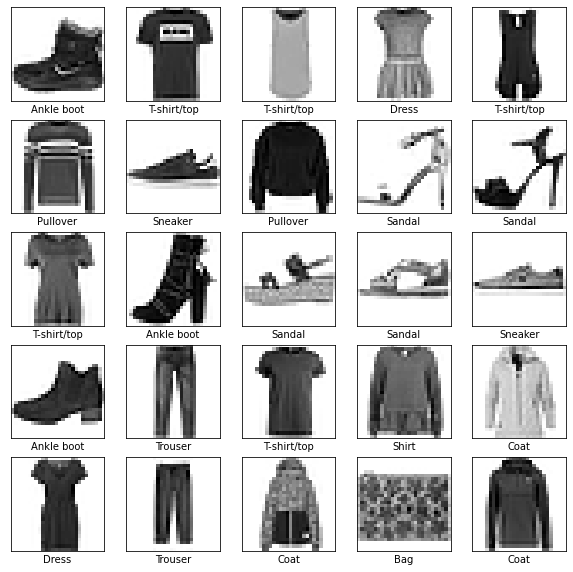

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Define your model

In [6]:
# parameters
num_classes = len(class_names)
input_shape = (28,28,1)

# build the model
def Model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

# display the model summary
model = Model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Launch your training

⚠️ Your training data should be saved in the following directory: `/workspace/my_container/runs`

Before starting your first run, remember to change to the `/my_container` directory using the `%cd` command:

In [7]:
%mkdir -p /workspace/my_container && cd /workspace/my_container

Now you can launch your first training!

In [8]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# add the TensorBoard callback
log_dir = "runs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# take a subset of images (you don't need to display all of them)
val_images, val_labels = X_test[:32], y_test[:32]

# launch the training
_ = model.fit(X_train, y_train,
              epochs = 10, 
              validation_data = (X_test, y_test),
              callbacks = [tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4942 - accuracy: 0.8214 - val_loss: 0.4479 - val_accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3828 - accuracy: 0.8615 - val_loss: 0.3917 - val_accuracy: 0.8597
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3523 - accuracy: 0.8696 - val_loss: 0.3755 - val_accuracy: 0.8593
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3283 - accuracy: 0.8781 - val_loss: 0.3493 - val_accuracy: 0.8739
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.3117 - accuracy: 0.8847 - val_loss: 0.3435 - val_accuracy: 0.8766
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2995 - accuracy: 0.8888 - val_loss: 0.3410 - val_accuracy: 0.8777
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2877 - accuracy: 0.8915 - val_loss: 0.3370 - val_accuracy

### Access to TensorBoard

You can access to your results display with the following code. 

To get the **link to TensorBoard**, play the following cell.

In [9]:
# https//:{the notebook ID}-{port}.{the notebook host}
import os

NOTEBOOK_ID = os.environ['NOTEBOOK_ID']
NOTEBOOK_HOST = os.environ['NOTEBOOK_HOST']

Click on the following link once TensorBoard is launched:

In [10]:
print("Visualize your training on TensorBoard with the following link:")
print(f'https://{NOTEBOOK_ID}-6006.{NOTEBOOK_HOST}')

Visualize your training on TensorBoard with the following link:
https://f6662ab6-8c9b-43bd-87ad-25a4f7423783-6006.notebook.gra.training.ai.cloud.ovh.net


#### ⚠️ Only the link given by the above cell is valid

Then play the command that will **launch the TensorBoard**.

In [11]:
!tensorboard --logdir=runs --bind_all


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

TensorBoard 2.8.0 at http://job-a728311c-713e-4bbd-84e1-b4a3ee94ee02:6006/ (Press CTRL+C to quit)
^C


### Overview of dynamic display with TensorBoard

Thanks to this dynamic display, you can see the **accuracy** and **loss** on the train and validation datasets at each epoch.

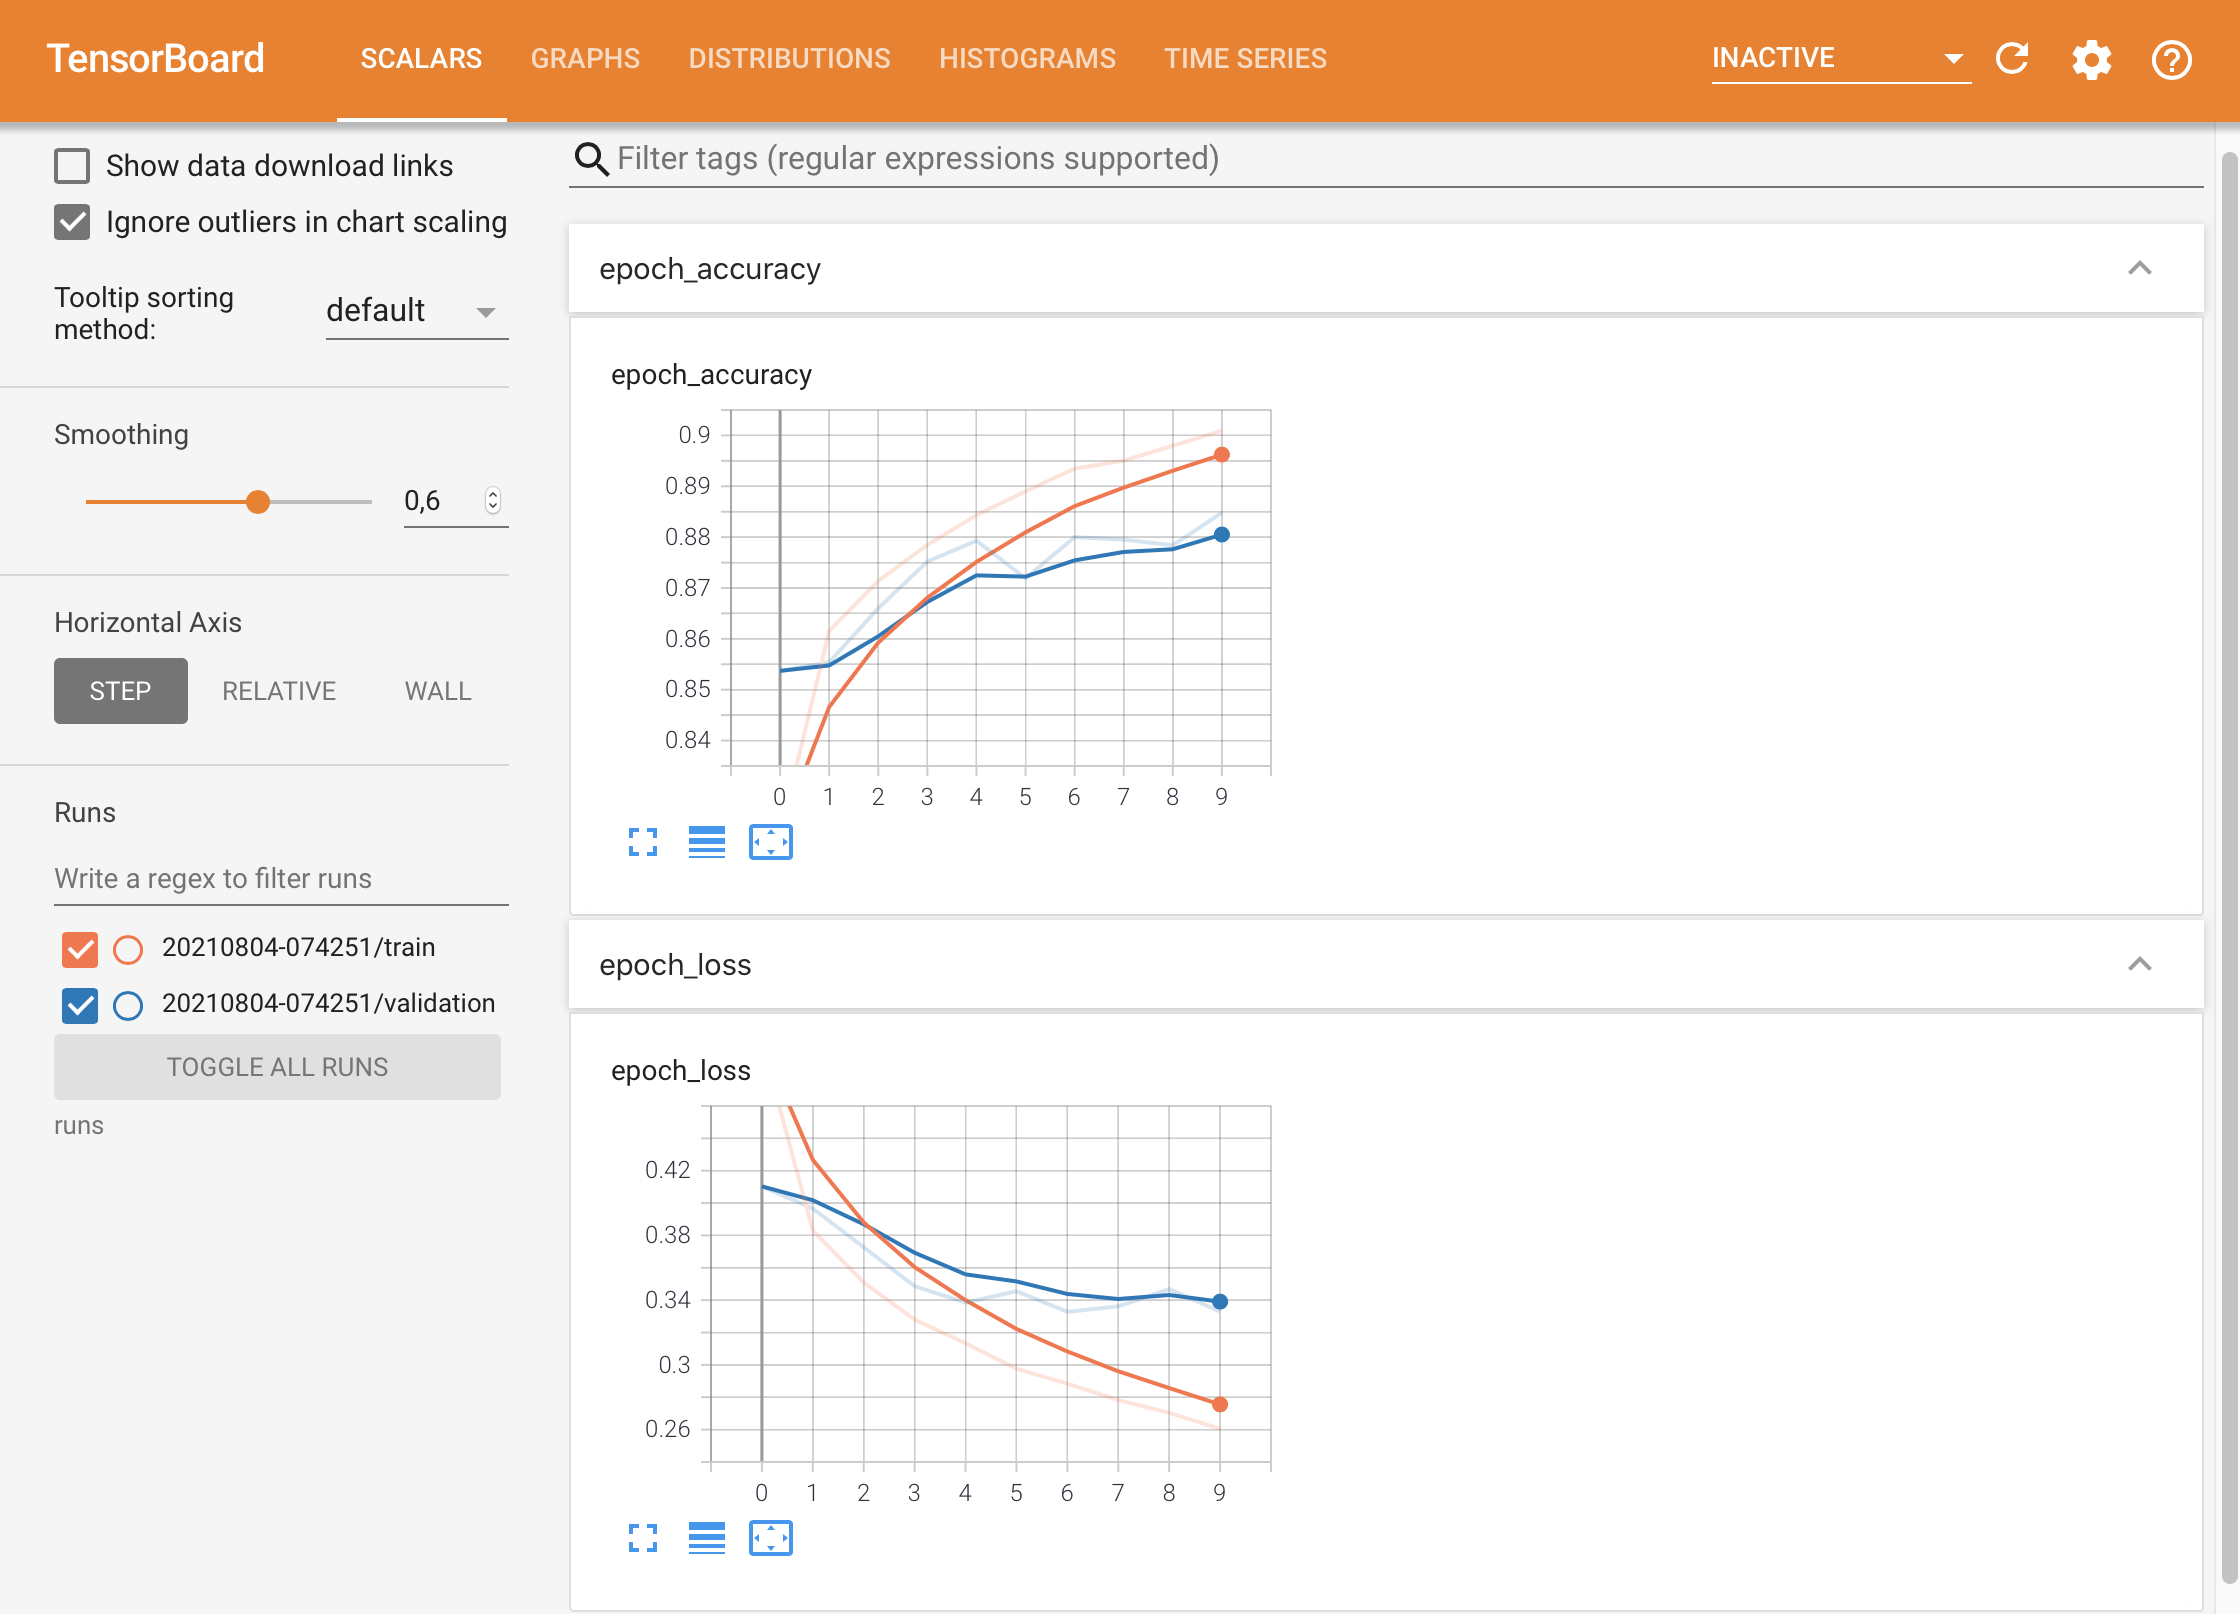


## Conclusion

Now that your data is saved in your object container, you can stop your `notebook`. 

As your data is stored in your object container, you will be able to reuse it and display it again by launching a simple **TensorBoard** from a `job` for example. Please refer to this [documentation](link).